# 1. Install PyCaret

In [45]:
# for google notebook
# !pip install pycaret

In [46]:
# Only if you are running this on google colab
from pycaret.utils import enable_colab
enable_colab()

Colab mode activated.


# 2. Import Dataset

In [47]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [48]:
import pandas as pd
path = '/content/gdrive/wine-quality-prediction-dataset.csv'
data = pd.read_csv('wine-quality-prediction-dataset.csv')

# 3. Setup Experiment

In [49]:
#import classification module
from pycaret.classification import *
exp_clf = setup(data, normalize = True, target = 'quality', session_id = 123)

 
Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(1599, 12)"
4,Missing Values,False
5,Numeric Features,11
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


# 4. Create Model

In [50]:
compare_models(blacklist = None, fold = 10,  round = 4, turbo = True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Extra Trees Classifier,0.904400,0.924800,0.428800,0.779700,0.544200,0.496600
1,CatBoost Classifier,0.902600,0.911500,0.467900,0.713700,0.560400,0.509200
2,Light Gradient Boosting Machine,0.898200,0.904100,0.493300,0.691400,0.567700,0.512100
3,Random Forest Classifier,0.897300,0.872300,0.375800,0.749500,0.492500,0.443400
4,Gradient Boosting Classifier,0.890100,0.899900,0.435000,0.671000,0.518800,0.460300
5,Extreme Gradient Boosting,0.882100,0.900100,0.389600,0.615100,0.467000,0.405500
6,Linear Discriminant Analysis,0.876700,0.877000,0.435000,0.550900,0.475800,0.409600
7,Decision Tree Classifier,0.875800,0.764500,0.611700,0.561800,0.576800,0.505600
8,Logistic Regression,0.874000,0.880700,0.309200,0.560800,0.389500,0.328500
9,Ada Boost Classifier,0.870400,0.855500,0.422100,0.527100,0.461800,0.390600


Creating separate Models

In [51]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8750,0.9320,0.2000,0.6000,0.3000,0.2498
1,0.8839,0.8832,0.4000,0.6000,0.4800,0.4176
2,0.8750,0.8447,0.3333,0.5556,0.4167,0.3515
3,0.8571,0.8570,0.1333,0.4000,0.2000,0.1426
4,0.8929,0.8763,0.3333,0.7143,0.4545,0.4037
5,0.8839,0.8990,0.4667,0.5833,0.5185,0.4535
6,0.8661,0.8900,0.1333,0.5000,0.2105,0.1633
7,0.8482,0.8561,0.3125,0.4545,0.3704,0.2874
8,0.8571,0.8750,0.3125,0.5000,0.3846,0.3086
9,0.9009,0.8938,0.4667,0.7000,0.5600,0.5067


In [52]:
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8929,0.9230,0.4667,0.6364,0.5385,0.4795
1,0.8750,0.8708,0.4000,0.5455,0.4615,0.3927
2,0.8839,0.8667,0.4000,0.6000,0.4800,0.4176
3,0.8393,0.8460,0.2000,0.3333,0.2500,0.1663
4,0.9018,0.8887,0.3333,0.8333,0.4762,0.4328
5,0.9375,0.9711,0.7333,0.7857,0.7586,0.7228
6,0.8929,0.9100,0.2667,0.8000,0.4000,0.3569
7,0.8393,0.8835,0.3125,0.4167,0.3571,0.2674
8,0.8393,0.8750,0.2500,0.4000,0.3077,0.2222
9,0.9189,0.9667,0.5333,0.8000,0.6400,0.5964


# 5. Tune Model

In [53]:
tuned_xgboost = tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9018,0.9306,0.5333,0.6667,0.5926,0.5375
1,0.8929,0.8653,0.6000,0.6000,0.6000,0.5381
2,0.8929,0.8632,0.4667,0.6364,0.5385,0.4795
3,0.8214,0.8199,0.4000,0.3529,0.3750,0.2713
4,0.9196,0.8756,0.5333,0.8000,0.6400,0.5968
5,0.9732,0.9814,0.8667,0.9286,0.8966,0.8812
6,0.9107,0.9271,0.4667,0.7778,0.5833,0.5368
7,0.8929,0.8874,0.5000,0.6667,0.5714,0.5116
8,0.8482,0.8757,0.4375,0.4667,0.4516,0.3636
9,0.9279,0.9715,0.5333,0.8889,0.6667,0.6291


## Ensemble Model

In [54]:
rf = create_model('rf')
ensembled_rf = ensemble_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9018,0.9285,0.3333,0.8333,0.4762,0.4328
1,0.9107,0.9210,0.4667,0.7778,0.5833,0.5368
2,0.8750,0.8619,0.3333,0.5556,0.4167,0.3515
3,0.8571,0.8296,0.2000,0.4286,0.2727,0.2050
4,0.9107,0.8777,0.4667,0.7778,0.5833,0.5368
5,0.9554,0.9849,0.7333,0.9167,0.8148,0.7898
6,0.8839,0.9127,0.2000,0.7500,0.3158,0.2749
7,0.8571,0.8929,0.2500,0.5000,0.3333,0.2632
8,0.8661,0.8633,0.3125,0.5556,0.4000,0.3312
9,0.9279,0.9583,0.5333,0.8889,0.6667,0.6291


## Blend Models

In [55]:
#blend all models
blend_all = blend_models()

#create models for blending
xgboost = create_model('xgboost')
lightgbm = create_model('lightgbm')
et = create_model('et')

#blend trained models
blend_specific = blend_models(estimator_list = [et, lightgbm, xgboost])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8839,0.0,0.3333,0.6250,0.4348,0.3767
1,0.8929,0.0,0.4667,0.6364,0.5385,0.4795
2,0.9107,0.0,0.4000,0.8571,0.5455,0.5031
3,0.8393,0.0,0.2000,0.3333,0.2500,0.1663
4,0.9286,0.0,0.4667,1.0000,0.6364,0.6025
5,0.9464,0.0,0.8000,0.8000,0.8000,0.7691
6,0.9196,0.0,0.4667,0.8750,0.6087,0.5685
7,0.8929,0.0,0.5000,0.6667,0.5714,0.5116
8,0.8571,0.0,0.3750,0.5000,0.4286,0.3488
9,0.9459,0.0,0.6667,0.9091,0.7692,0.7394


## Stack Models

In [56]:
# create models for stacking
dt = create_model('dt')
rf = create_model('rf')
ada = create_model('ada')
ridge = create_model('ridge')
knn = create_model('knn')

# stack trained models
stacked_models = stack_models(estimator_list=[dt,rf,ada,ridge,knn])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9018,0.9450,0.4000,0.7500,0.5217,0.4726
1,0.8661,0.8914,0.3333,0.5000,0.4000,0.3280
2,0.8929,0.8777,0.4000,0.6667,0.5000,0.4442
3,0.8393,0.8612,0.3333,0.3846,0.3571,0.2658
4,0.8929,0.9038,0.3333,0.7143,0.4545,0.4037
5,0.9018,0.9601,0.5333,0.6667,0.5926,0.5375
6,0.8839,0.9189,0.2667,0.6667,0.3810,0.3297
7,0.8839,0.8971,0.5625,0.6000,0.5806,0.5134
8,0.8661,0.8984,0.3750,0.5455,0.4444,0.3713
9,0.9369,0.9535,0.6000,0.9000,0.7200,0.6861


## Create Stacknet

In [57]:
#create models for stacknet
dt = create_model('dt')
rf = create_model('rf')
ada = create_model('ada')
ridge = create_model('ridge')
knn = create_model('knn')

#create stacknet
stacknet = create_stacknet(estimator_list =[[dt,rf],[ada,ridge,knn]])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9018,0.9443,0.4000,0.7500,0.5217,0.4726
1,0.9018,0.8962,0.5333,0.6667,0.5926,0.5375
2,0.9107,0.8832,0.5333,0.7273,0.6154,0.5662
3,0.8571,0.8625,0.4667,0.4667,0.4667,0.3842
4,0.8929,0.9045,0.4000,0.6667,0.5000,0.4442
5,0.9107,0.9622,0.5333,0.7273,0.6154,0.5662
6,0.9107,0.9196,0.4667,0.7778,0.5833,0.5368
7,0.8929,0.9017,0.5625,0.6429,0.6000,0.5385
8,0.8929,0.9004,0.3750,0.7500,0.5000,0.4474
9,0.9099,0.9507,0.6000,0.6923,0.6429,0.5916


## ROC Curve Plot

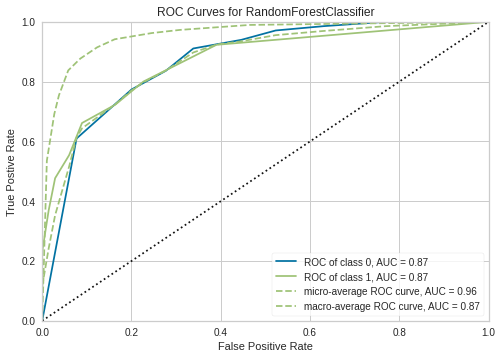

In [58]:
rf = create_model('rf')
plot_model(estimator = rf, plot = 'auc')

## Evaluating a model

In [59]:
#create a model
rf = create_model('rf')
#evaluate a model
evaluate_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8839,0.8182,0.2667,0.6667,0.3810,0.3297
1,0.9018,0.8880,0.4667,0.7000,0.5600,0.5072
2,0.8839,0.8866,0.3333,0.6250,0.4348,0.3767
3,0.8571,0.7863,0.2000,0.4286,0.2727,0.2050
4,0.9018,0.8447,0.2667,1.0000,0.4211,0.3865
5,0.9554,0.9838,0.6667,1.0000,0.8000,0.7760
6,0.9196,0.8911,0.4000,1.0000,0.5714,0.5359
7,0.8929,0.8587,0.4375,0.7000,0.5385,0.4815
8,0.8393,0.7959,0.1875,0.3750,0.2500,0.1711
9,0.9369,0.9694,0.5333,1.0000,0.6957,0.6641


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## Interpreting a Model

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8929,0.9230,0.4667,0.6364,0.5385,0.4795
1,0.8750,0.8708,0.4000,0.5455,0.4615,0.3927
2,0.8839,0.8667,0.4000,0.6000,0.4800,0.4176
3,0.8393,0.8460,0.2000,0.3333,0.2500,0.1663
4,0.9018,0.8887,0.3333,0.8333,0.4762,0.4328
5,0.9375,0.9711,0.7333,0.7857,0.7586,0.7228
6,0.8929,0.9100,0.2667,0.8000,0.4000,0.3569
7,0.8393,0.8835,0.3125,0.4167,0.3571,0.2674
8,0.8393,0.8750,0.2500,0.4000,0.3077,0.2222
9,0.9189,0.9667,0.5333,0.8000,0.6400,0.5964


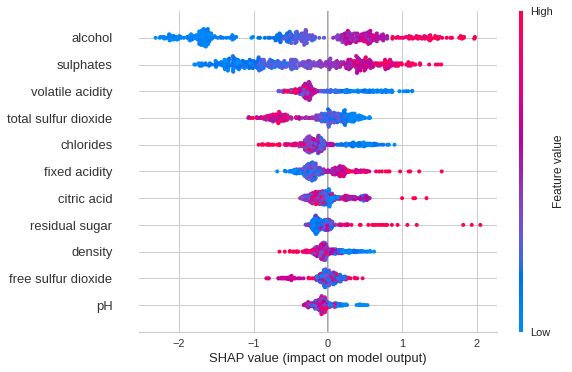

In [60]:
xgboost = create_model('xgboost')
interpret_model(xgboost)

# 6. Save Model

In [61]:
#save trained model
save_model(xgboost, 'xgboost_model_04242020')

Transformation Pipeline and Model Succesfully Saved


# 7. Save Experiment

In [62]:
save_experiment('experiment_04242020')

Experiment Succesfully Saved


## End of Notebook